In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re

## **STEPS:**
1. Import all the libraries for Web Scraping, Data Visualisation, Analysis
2. Scrape the data
3. Data Cleaning, Data Exploration, Data Manipulation
4. Convert it into the DataFrame
5. Perform the Analysis (EDA)

# **FIFA Dataset**

link:https://sofifa.com/players?offset=[1-10]

In [4]:
url = "https://sofifa.com/players?offset=1"
req=requests.get(url)

In [5]:
# Checking the status code
req

<Response [200]>

In [6]:
soup = BeautifulSoup(req.content)
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Dec 17, 2022 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Dec 17, 2022" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2023 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" r

#**Data Cleaning, Data Exploration, Data Manipulation**

In [7]:
fifa=pd.DataFrame()
for i in range(1,11):
    url=f"https://sofifa.com/players?offset={i}"
    req=requests.get(url)
    soup = BeautifulSoup(req.content)
    img =[]
    name =[]
    age =[]
    ova =[]
    pot =[]
    team =[]
    duration =[]
    value =[]
    wage =[]
    ts=[]
    for i in soup.findAll('tr'):
        img.append(re.sub('<img.*2x,|3x.*"/>',"",str(i.find('img'))))
        name.append(re.sub('^<a.*s">|</.*>',"",str(i.find('a',{"data-tip-pos":"top"}))))
        age.append(re.sub('<td.*e">|</td>',"",str(i.find('td',{"data-col":"ae"}))))
        ova.append(re.sub('<sp.*">|</span>',"",str(i.findAll('span')[1])))
        pot.append(re.sub('<sp.*">|</span>',"",str(i.findAll('span')[2])))
        team.append(re.sub('<a.*">|</a>',"",str(i.findAll('a')[-1])))
        duration.append(re.sub('<div.*>|\n|</div>',"",str(i.find('div',{"class":"sub"}))))
        ts.append(re.sub('<sp.*">|</span>',"",str(i.findAll('span')[-1])))
        value.append(re.sub('<td.*">|</td>|M|€|K|',"",str(i.find('td',{"data-col":"vl"}))))
        wage.append(re.sub('<td.*">|</td>|K|€|',"",str(i.find('td',{"data-col":"wg"}))))

    df=pd.DataFrame({"Image Link":img,"Name":name,"Age":age,"OVA":ova,"POT":pot,"Team":team,"Duration":duration,"Value":value,"Wage":wage,"Total stats":ts})
    df.drop(0,inplace=True)
    df["OVA"]=pd.to_numeric(df["OVA"],errors='coerce')
    df["Age"]=pd.to_numeric(df["Age"],errors='coerce')
    df["POT"]=pd.to_numeric(df["POT"],errors='coerce')
    df["Total stats"]=pd.to_numeric(df["Total stats"],errors='ignore')
    df["Wage"]=pd.to_numeric(df["Wage"],errors='coerce')
    fifa=pd.concat([fifa,df],ignore_index=True)


In [8]:
fifa.tail()

,Image Link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total stats
595,https://cdn.sofifa.net/players/262/118/23_180...,T. Livramento,19,75.0,85.0,Southampton,2021 ~ 2026,11.5,22,1862
596,https://cdn.sofifa.net/players/223/045/23_180...,U. Çiftçi,30,55.0,50.0,Sivasspor,2018 ~ 2023,1,7,1808
597,https://cdn.sofifa.net/players/243/576/23_180...,Pedro Porro,22,81.0,82.0,Sporting CP,2022 ~ 2025,46,16,2157
598,https://cdn.sofifa.net/players/253/004/23_180...,Ansu Fati,19,79.0,90.0,FC Barcelona,2018 ~ 2027,38,84,1913
599,https://cdn.sofifa.net/players/264/309/23_180...,A. Güler,17,71.0,76.0,Fenerbahçe,2021 ~ 2025,4,4,1786


In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image Link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          293 non-null    float64
 4   POT          500 non-null    float64
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    object 
 8   Wage         600 non-null    int64  
 9   Total stats  600 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 47.0+ KB


In [11]:
# To change the data type of column "Value"
fifa.Value=fifa.Value.astype(float)

# To delete 'image link' and 'duration' column permanently

In [12]:
fifa.drop(["Image Link","Duration"],inplace=True,axis=1)

In [13]:
fifa.tail()

,Name,Age,OVA,POT,Team,Value,Wage,Total stats
595,T. Livramento,19,75.0,85.0,Southampton,11.5,22,1862
596,U. Çiftçi,30,55.0,50.0,Sivasspor,1.0,7,1808
597,Pedro Porro,22,81.0,82.0,Sporting CP,46.0,16,2157
598,Ansu Fati,19,79.0,90.0,FC Barcelona,38.0,84,1913
599,A. Güler,17,71.0,76.0,Fenerbahçe,4.0,4,1786


In [14]:
fifa.describe()

,Age,OVA,POT,Value,Wage,Total stats
count,600.000000,293.000000,500.000000,600.000000,600.000000,600.000000
mean,21.685000,72.313993,76.414000,60.599167,58.403333,1888.651667
std,4.324382,9.854613,9.172069,160.972421,116.724540,226.881104
min,17.000000,48.000000,50.000000,0.000000,0.000000,1010.000000
25%,19.000000,67.000000,72.000000,5.500000,9.000000,1734.000000
50%,21.000000,73.000000,77.500000,16.000000,29.000000,1948.000000
75%,23.000000,79.000000,83.000000,44.500000,60.000000,2052.000000
max,37.000000,92.000000,91.000000,950.000000,750.000000,2239.000000


# **Data Analytics - EDA**

# 1. Duplicated datas

In [15]:
fifa.duplicated().sum()

531

In [16]:
# To delete duplicated datas
fifa.drop_duplicates(inplace=True)

In [17]:
fifa.shape

(69, 8)

# 2. Find the name of the player who is having the highest wage

In [19]:
fifa[fifa["Wage"]==max(fifa["Wage"])]

,Name,Age,OVA,POT,Team,Value,Wage,Total stats
12,M. Mudryk,21,NaN,75.0,Shakhtar Donetsk,12.5,750,1823


# 3. Find the name and age of the oldest player

In [20]:
fifa[fifa["Age"]==max(fifa["Age"])][["Name","Age"]]


,Name,Age
16,Cristiano Ronaldo,37


# 4. Find the name and age of the youngest player

In [21]:
fifa[fifa["Age"]==min(fifa["Age"])][["Name","Age"]]

,Name,Age
8,N. Mbamba,17
19,Y. Moukoko,17
23,Gavi,17
25,A. Nusa,17
47,M. Tel,17
599,A. Güler,17


# 5. List out the top 10 players according to their POT

In [22]:
fifa.sort_values(by=["POT"],ascending=False)[["Name","POT"]][0:10]

,Name,POT
59,J. Bellingham,91.0
17,L. Messi,91.0
16,Cristiano Ronaldo,91.0
479,Ansu Fati,90.0
19,Y. Moukoko,89.0
52,N. Madueke,86.0
44,K. Koné,86.0
38,G. Scalvini,85.0
5,G. Rutter,85.0
6,C. Gallagher,85.0


# 6. Find the top 10 players according to their Value

In [39]:
fifa.sort_values(by=["Value"],ascending=False)[["Name","Team","Value"]].head(10)

,Name,Team,Value
50,C. Cîrjan,Arsenal,950.0
15,S. Nkansah,Erzgebirge Aue,725.0
33,E. Salomonsson,IFK Göteborg,525.0
45,K. Havertz,Chelsea,84.5
59,J. Bellingham,Borussia Dortmund,81.5
237,F. Valverde,Real Madrid,81.0
58,B. Saka,Arsenal,72.0
26,Rafael Leão,Milan,66.5
36,F. Wirtz,Bayer 04 Leverkusen,66.0
1,D. Núñez,Liverpool,61.5


# 7. Plot a graph - Player's Name v/s Player's POT

In [ ]:
new_df=fifa[["Name","POT","Wage"]]

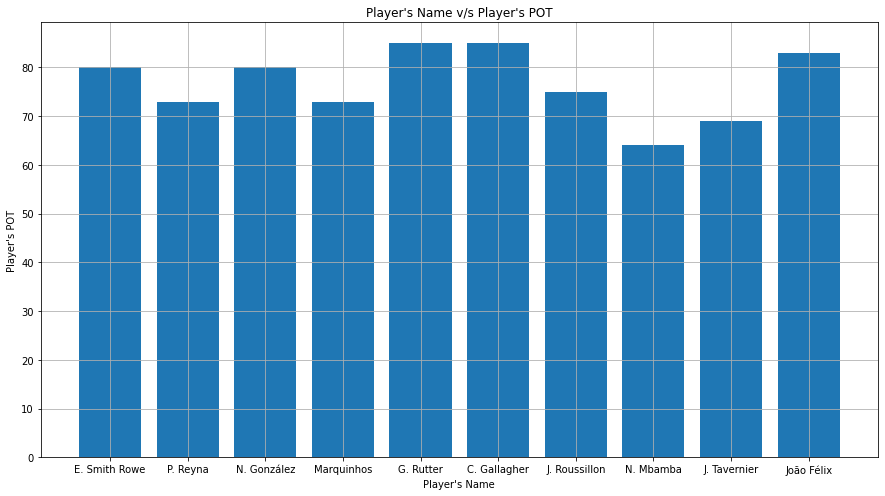

In [43]:
fig=plt.figure(figsize=(15,8))
plt.xlabel("Player's Name")
plt.ylabel("Player's POT")
plt.title("Player's Name v/s Player's POT")
plt.bar(new_df["Name"].head(10),new_df["POT"].head(10))
plt.grid()

# 8. Plot a graph - Player's Name v/s Player's Wage

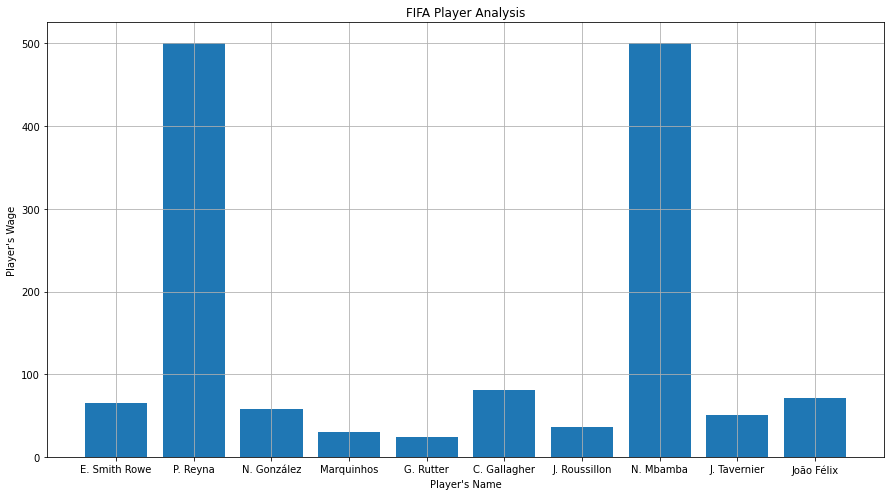

In [45]:
fig=plt.figure(figsize=(15,8))
plt.xlabel("Player's Name")
plt.ylabel("Player's Wage")
plt.title("FIFA Player Analysis")
plt.bar(new_df["Name"].head(10),new_df["Wage"].head(10))
plt.grid()

# 9. Find all the players whose potential is more than or equal to 90

In [46]:
fifa[fifa["POT"]>=90][["Name","Team","POT"]]

,Name,Team,POT
16,Cristiano Ronaldo,"<img alt="""" class=""flag"" data-src=""https://cdn...",91.0
17,L. Messi,Paris Saint Germain,91.0
59,J. Bellingham,Borussia Dortmund,91.0
479,Ansu Fati,FC Barcelona,90.0


# 10. Find all the players whose potential is more than 90 and age is less than 25

In [47]:
fifa[(fifa["POT"]>90) & (fifa["Age"]<25)][["Name","Age","POT","Team"]]

,Name,Age,POT,Team
59,J. Bellingham,19,91.0,Borussia Dortmund


# 11. Find all the players whose value is more than 40 but wage is less than 20

In [48]:
fifa[(fifa["Value"]>40) & (fifa["Wage"]<20)][["Name","Team","Value","Wage",]]

,Name,Team,Value,Wage
15,S. Nkansah,Erzgebirge Aue,725.0,1
20,E. Fernández,Benfica,42.5,13
33,E. Salomonsson,IFK Göteborg,525.0,2
50,C. Cîrjan,Arsenal,950.0,7
56,J. Timber,Ajax,44.5,14
419,Pedro Porro,Sporting CP,46.0,16


# 12. Plot a heatmap

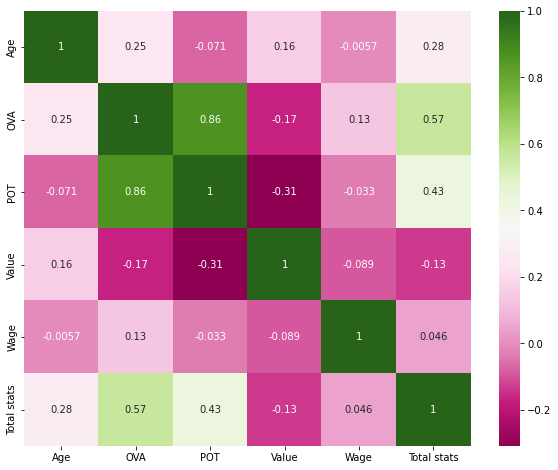

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(fifa.corr(),annot=True,cmap="PiYG")